In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
DATA_PATH = './'

In [15]:
movies_df = pd.read_csv(DATA_PATH + "/ml-1m/movies.dat", sep='::', header=None, encoding="ISO-8859-1",
                        engine='python')
movies_df.columns = ["movieId", "movie title", "genres"]
movies_df = movies_df.join(movies_df["genres"].str.get_dummies('|')).drop('genres', axis=1)
movies_df = movies_df.astype({'movieId': int})
movies_df = movies_df.set_index('movieId')

ratings_df = pd.read_csv(DATA_PATH + '/ml-1m/ratings.dat', sep='::', header=None, engine='python')
ratings_df.columns = ['userId', 'movieId', 'rating', 'timestamp']
ratings_df = ratings_df.astype({'userId': int, 'movieId': int})
ratings_df.rating = ratings_df.rating / ratings_df.rating.max()
ratings_df = ratings_df.set_index(['userId', 'movieId'])

user_df = pd.read_csv(DATA_PATH + '/ml-1m/users.dat', sep='::', header=None,
                      encoding="ISO-8859-1", engine='python')
user_df.columns = ['userId', 'gender', 'age', 'occupation', 'zip']
user_df = user_df.astype({'userId': int})
user_df = user_df.set_index('userId')

In [19]:
genres = ['Action', 'Romance', 'Crime', 'Musical', 'Sci-Fi']

# filter movies and ratings outside of the genres
movies_df = movies_df[movies_df[genres].sum(axis=1) >= 1]
ratings_df = ratings_df.reindex(movies_df.index, level='movieId').dropna(axis='index')

# filter users that have less than n ratings
ratings_df = ratings_df.groupby('userId').filter(lambda x: x.shape[0] > 50)
# filter ratings by users have dont have demographic information
ratings_df = ratings_df.reindex(user_df.index, level='userId').dropna(axis='index')

# filter users in user df that did not have n ratings
user_df = user_df.loc[ratings_df.index.get_level_values('userId').unique()]
# filter movies in movie df
movies_df = movies_df.loc[ratings_df.index.get_level_values('movieId').unique()]

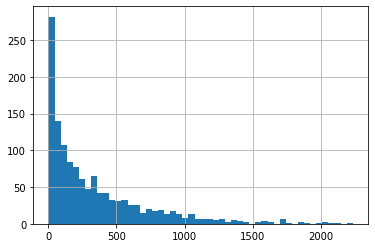

In [34]:
ratings_df.reset_index().movieId.value_counts().hist(bins=50)

In [35]:
reindexed_ratings_df = ratings_df.reset_index()
ratings_by_group = reindexed_ratings_df.groupby(lambda x: user_df.loc[reindexed_ratings_df.loc[x].userId].gender)

In [45]:
female_ratings_by_movie = ratings_by_group.get_group('F').groupby('movieId')

In [47]:
female_ratings_by_movie.groups.keys()

dict_keys([3, 6, 7, 9, 10, 11, 15, 17, 20, 21, 22, 24, 25, 28, 29, 32, 35, 39, 42, 44, 46, 47, 48, 49, 50, 58, 64, 66, 68, 70, 71, 73, 74, 76, 81, 85, 89, 93, 95, 98, 105, 107, 110, 112, 117, 118, 122, 123, 129, 131, 139, 140, 145, 149, 151, 153, 160, 163, 164, 165, 168, 170, 172, 173, 179, 181, 182, 185, 195, 196, 198, 199, 202, 204, 207, 208, 215, 222, 224, 227, 236, 237, 239, 242, 245, 247, 249, 251, 252, 256, 258, 259, 260, 265, 266, 270, 276, 283, 286, 287, 288, 289, 290, 292, 293, 294, 295, 296, 301, 302, 303, 315, 316, 327, 329, 332, 338, 339, 342, 346, 349, 351, 353, 356, 357, 359, 360, 361, 362, 364, 367, 368, 376, 377, 378, 379, 380, 384, 387, 389, 390, 391, 393, 394, 405, 417, 420, 423, 425, 426, 427, 431, 434, 435, 438, 440, 442, 444, 446, 447, 451, 457, 459, 461, 462, 463, 464, 465, 466, 468, 469, 471, 474, 479, 480, 485, 493, 494, 496, 497, 498, 499, 502, 504, 507, 509, 511, 512, 513, 517, 519, 521, 522, 532, 533, 534, 539, 541, 543, 544, 546, 547, 548, 550, 551, 552, 555

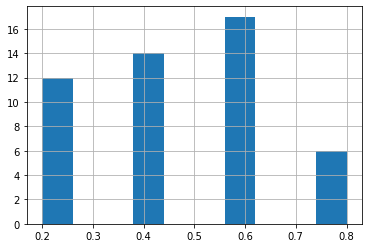

In [56]:
female_ratings_by_movie.get_group(3394).rating.hist()

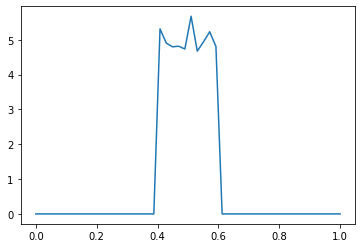

In [79]:
data = np.random.uniform(size=100000) * 0.2 + 0.4
density = gaussian_kde(data)
xs = np.linspace(0,1)
density.covariance_factor = lambda : .0025
density._compute_covariance()
plt.figure()
plt.plot(xs,density(xs))
plt.show()

In [117]:
def nextGamma(shape, scale):
    if (shape < 1):
        transform_flag = True
        alpha = shape + 1
    else: 
        transform_flag = False
        alpha = shape

    d = alpha - 1.0 / 3.0;
    c = 1 / np.sqrt(9.0 * d)
    V = -1
    while (True):
        while (V <= 0):
            Z = np.random.normal()
            V = 1 + c * Z;

        #V is a truncated normal distribution
        V = np.power(V, 3.0)
        U = np.random.uniform()
        
        if ((U < 1.0 - 0.0331 * np.power(Z, 4.0)) or
                (np.log(U) < 0.5 * np.power(Z, 2) + d * (1 - V + np.log(V)))):
            gamma_sample = d * V
            break
        V = -1

    if (transform_flag):
        U = np.random.uniform()
        gamma_sample = gamma_sample * np.power(U, (1 / shape))

    return scale * gamma_sample

In [152]:
data = []
for i in range(100000):
    data.append(nextGamma(9, 0.5))

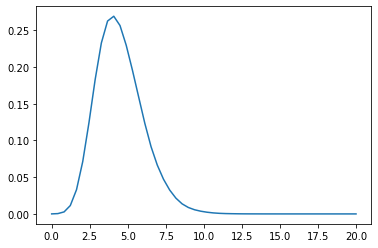

In [153]:
density = gaussian_kde(data)
xs = np.linspace(0,20)
density.covariance_factor = lambda : .25
density._compute_covariance()
plt.figure()
plt.plot(xs,density(xs))
plt.show()

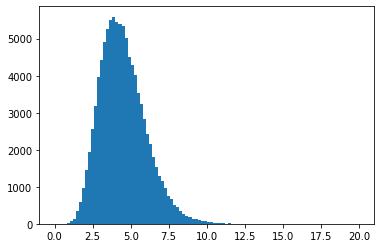

In [154]:
plt.figure()
plt.hist(data, 100, (0,20))
plt.show()